<h1 style="text-align:center">Algorithme des $k$ plus proches voisins</h1>

<h2>Introduction</h2>
L’algorithme des $k$ plus proches voisins ($k$ nearest neightboors : knn) appartient à la famille des algorithmes d'apprentissage automatique (machine learning). L'idée de ces algorithmes est d'utiliser un grand nombre de données afin d'&laquo;apprendre&raquo; à la machine à résoudre un certain type de problème. Cette idée d'apprentissage automatique ne date pas d'hier, puisque le terme de machine learning a été utilisé pour la première fois par l'informaticien américain Arthur Samuel en 1959. Les algorithmes d'apprentissage automatique ont connu un fort regain d'intérêt au début des années 2000 notamment grâce à la quantité de données disponibles sur internet (on parle de *big data*). 

De nombreuses sociétés (exemple les GAFAM) utilisent les données concernant leurs utilisateurs afin de "nourrir" des algorithmes de machine learning qui permettront à ces sociétés d'en savoir toujours plus sur nous et ainsi de mieux cerner nos "besoins" en termes de consommation.

D'un point de vue théorique, l'algorithme des $k$ plus proches voisins est un algorithme d'apprentissage supervisé : à partir d'un ensemble E de données labellisées, il sera possible de classer (déterminer le label) d'une nouvelle donnée (donnée n'appartenant pas à E).

<h2>Présentation de l'exemple</h2>
L'exemple classique que nous allons traiter est celui des données "iris de Fisher". En 1936, Edgar Anderson a collecté des données sur 3 espèces d'iris : "iris setosa", "iris virginica" et "iris versicolor".

<table>
  <tr>
    <td style="text-align:center"><img alt="iris_setosa" src="iris_setosa.jpeg" width=200px height=200px></td>
    <td style="text-align:center"><img alt="iris_versicolor" src="iris_versicolor.jpeg" width=200px height=200px></td>
    <td style="text-align:center"><img alt="iris_virginica" src="iris_virginica.jpeg" width=200px height=200px></td>
  </tr>
  <tr>
    <td style="text-align:center">iris_setosa</td>
    <td style="text-align:center">iris_versicolor</td>
    <td style="text-align:center">iris_virginica</td>
  </tr>
<table>

Pour chaque iris étudié, Anderson a mesuré (en cm) :
   * la largeur des sépales
   * la longueur des sépales
   * la largeur des pétales
   * la longueur des pétales

Par souci de simplification, nous nous intéresserons uniquement à la largeur et à la longueur des pétales.

Pour chaque iris mesuré, Anderson a aussi noté l'espèce ("iris setosa", "iris versicolor" ou "iris virginica")

Vous trouverez 50 de ces mesures dans le fichier <a href="iris.csv">iris.csv</a>

En résumé, vous trouverez dans ce fichier :
   * la longueur des pétales
   * la largeur des pétales
   * l'espèce de l'iris (au lieu d'utiliser les noms des espèces, on utilisera des chiffres : 0 pour "iris setosa", 1 pour "iris versicolor" et 2 pour "iris virginica")

>Pour exécuter une cellule, placer le curseur dans la cellule et appuyer sur le bouton <button class="btn btn-default" title="Run"><i class="fa-step-forward fa"></i><span class="toolbar-btn-label">Run</span></button> en haut de l'écran ou sur les touches **`<Maj+Entree>`**.

><h3 class='fa fa-cogs' style="color: darkorange"> A faire vous-même </h3>
>
>Exécuter la cellule ci dessous pour avoir un aperçu du contenu du fichier <a href="iris.csv">iris.csv</a>. Les plus attentifs d'entre vous doivent reconnaître une instruction bash.

In [2]:
cat iris.csv

petal_length,petal_width,species
1.4,0.2,0
1.4,0.2,0
1.3,0.2,0
1.5,0.2,0
1.4,0.2,0
1.7,0.4,0
1.4,0.3,0
1.5,0.2,0
1.4,0.2,0
1.5,0.1,0
1.5,0.2,0
1.6,0.2,0
1.4,0.1,0
1.1,0.1,0
1.2,0.2,0
1.5,0.4,0
1.3,0.4,0
1.4,0.3,0
1.7,0.3,0
1.5,0.3,0
1.7,0.2,0
1.5,0.4,0
1.0,0.2,0
1.7,0.5,0
1.9,0.2,0
1.6,0.2,0
1.6,0.4,0
1.5,0.2,0
1.4,0.2,0
1.6,0.2,0
1.6,0.2,0
1.5,0.4,0
1.5,0.1,0
1.4,0.2,0
1.5,0.1,0
1.2,0.2,0
1.3,0.2,0
1.5,0.1,0
1.3,0.2,0
1.5,0.2,0
1.3,0.3,0
1.3,0.3,0
1.3,0.2,0
1.6,0.6,0
1.9,0.4,0
1.4,0.3,0
1.6,0.2,0
1.4,0.2,0
1.5,0.2,0
1.4,0.2,0
4.7,1.4,1
4.5,1.5,1
4.9,1.5,1
4.0,1.3,1
4.6,1.5,1
4.5,1.3,1
4.7,1.6,1
3.3,1.0,1
4.6,1.3,1
3.9,1.4,1
3.5,1.0,1
4.2,1.5,1
4.0,1.0,1
4.7,1.4,1
3.6,1.3,1
4.4,1.4,1
4.5,1.5,1
4.1,1.0,1
4.5,1.5,1
3.9,1.1,1
4.8,1.8,1
4.0,1.3,1
4.9,1.5,1
4.7,1.2,1
4.3,1.3,1
4.4,1.4,1
4.8,1.4,1
5.0,1.7,1
4.5,1.5,1
3.5,1.0,1
3.8,1.1,1
3.7,1.0,1
3.9,1.2,1
5.1,1.6,1
4.5,1.5,1
4.5,1.6,1
4.7,1.5,1
4.4,1.3,1
4.1,1.3,1
4.0,1.3,1
4.4,1.2,1
4.6,1.4,1
4.0,1.2,1
3.3,1.0,1
4.2,1.3,1
4.2,1.2,1
4.2,1.3

<h2>Visualisation des données<h2>
Avant d'entrer dans le vif du sujet (algorithme knn), nous allons chercher à obtenir une représentation graphique des données contenues dans le fichier <a href="iris.csv">iris.csv</a>.

><h3 class='fa fa-cogs' style="color: darkorange"> A faire vous-même </h3>
>
>Étudier puis tester (en l'exécutant comme vu plus haut) le code suivant :

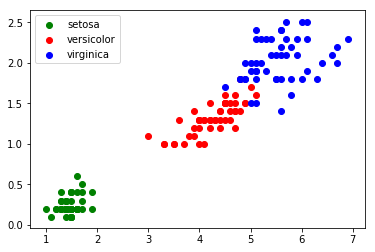

In [7]:
import matplotlib.pyplot as plt

lst_long = [[], [], []]
lst_larg = [[], [], []]
with open("iris.csv") as fic:
    fic.readline()  # on ignore la première ligne contenant les titres
    for ligne in fic:
        long, larg, esp = ligne.split(',')
        esp = int(esp)
        lst_long[esp].append(float(long))
        lst_larg[esp].append(float(larg))

plt.scatter(lst_long[0], lst_larg[0], color='g', label='setosa')
plt.scatter(lst_long[1], lst_larg[1], color='r', label='versicolor')
plt.scatter(lst_long[2], lst_larg[2], color='b', label='virginica')
plt.legend()
plt.show()
